In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!unzip '/content/gdrive/MyDrive/2. Sophomore Year/Semester 2/DS 340/Final Project/archive.zip'

In [ ]:
!ls

# Keras Model


In [ ]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
from keras.optimizers import rmsprop
image_size = (224, 224)
batch_size = 32
# Data from https://www.kaggle.com/competitions/dogs-vs-cats/
# Code from https://keras.io/examples/vision/image_classification_from_scratch/
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/chest_xray/train",
    subset="training",
    validation_split=0.2,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/chest_xray/test",
    subset="validation",
    validation_split=0.2,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 624 files belonging to 2 classes.
Using 124 files for validation.


Model 1: adam optimizer

In [ ]:
model1 = keras.Sequential()
model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model1.add(layers.Rescaling(scale=1/256, offset=0))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

epochs = 10

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model1.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/10
131/131 [==============================] - 40s 201ms/step - loss: 0.7932 - accuracy: 0.8565 - val_loss: 0.3738 - val_accuracy: 0.8387
Epoch 2/10
131/131 [==============================] - 26s 191ms/step - loss: 0.1031 - accuracy: 0.9631 - val_loss: 0.4810 - val_accuracy: 0.8145
Epoch 3/10
131/131 [==============================] - 26s 185ms/step - loss: 0.0724 - accuracy: 0.9739 - val_loss: 1.0289 - val_accuracy: 0.7339
Epoch 4/10
131/131 [==============================] - 26s 179ms/step - loss: 0.0438 - accuracy: 0.9844 - val_loss: 1.0151 - val_accuracy: 0.7661
Epoch 5/10
131/131 [==============================] - 26s 187ms/step - loss: 0.0270 - accuracy: 0.9907 - val_loss: 1.2650 - val_accuracy: 0.7500
Epoch 6/10
131/131 [==============================] - 26s 189ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 1.5803 - val_accuracy: 0.7339
Epoch 7/10
131/131 [==============================] - 26s 190ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 1.7187 - val_ac

Model 2: rmsprop optimizer

In [ ]:
model2 = keras.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model2.add(layers.Rescaling(scale=1/256, offset=0))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

epochs = 10

model2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

model2.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/10
131/131 [==============================] - 27s 184ms/step - loss: 0.8886 - accuracy: 0.8164 - val_loss: 0.4640 - val_accuracy: 0.7903
Epoch 2/10
131/131 [==============================] - 26s 187ms/step - loss: 0.2079 - accuracy: 0.9209 - val_loss: 1.0911 - val_accuracy: 0.6855
Epoch 3/10
131/131 [==============================] - 26s 187ms/step - loss: 0.2057 - accuracy: 0.9331 - val_loss: 0.5310 - val_accuracy: 0.8226
Epoch 4/10
131/131 [==============================] - 26s 186ms/step - loss: 0.1026 - accuracy: 0.9614 - val_loss: 1.1513 - val_accuracy: 0.7419
Epoch 5/10
131/131 [==============================] - 25s 184ms/step - loss: 0.1013 - accuracy: 0.9665 - val_loss: 0.8396 - val_accuracy: 0.7661
Epoch 6/10
131/131 [==============================] - 25s 183ms/step - loss: 0.0727 - accuracy: 0.9722 - val_loss: 0.7557 - val_accuracy: 0.8065
Epoch 7/10
131/131 [==============================] - 25s 172ms/step - loss: 0.0642 - accuracy: 0.9777 - val_loss: 1.0985 - val_ac

Model 3: rmsprop, binary_crossentropy, extra conv2D layers and maxpoolings

In [ ]:
model3 = keras.Sequential()
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model3.add(layers.Rescaling(scale=1/256, offset=0))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))


model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(512, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

epochs = 10

model3.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

model3.fit(train_ds, epochs=epochs, validation_data=val_ds)



Epoch 1/10
131/131 [==============================] - 27s 182ms/step - loss: 0.5975 - accuracy: 0.7295 - val_loss: 0.6790 - val_accuracy: 0.6694
Epoch 2/10
131/131 [==============================] - 26s 188ms/step - loss: 0.3538 - accuracy: 0.8483 - val_loss: 1.0024 - val_accuracy: 0.7419
Epoch 3/10
131/131 [==============================] - 25s 180ms/step - loss: 0.2344 - accuracy: 0.9034 - val_loss: 0.3960 - val_accuracy: 0.8387
Epoch 4/10
131/131 [==============================] - 25s 183ms/step - loss: 0.1506 - accuracy: 0.9394 - val_loss: 1.0276 - val_accuracy: 0.7742
Epoch 5/10
131/131 [==============================] - 25s 184ms/step - loss: 0.1178 - accuracy: 0.9538 - val_loss: 0.6566 - val_accuracy: 0.8226
Epoch 6/10
131/131 [==============================] - 25s 183ms/step - loss: 0.0902 - accuracy: 0.9624 - val_loss: 0.9830 - val_accuracy: 0.7984
Epoch 7/10
131/131 [==============================] - 25s 179ms/step - loss: 0.0726 - accuracy: 0.9710 - val_loss: 1.2171 - val_ac

Model 4: added dropout and random rotation

In [ ]:
model4 = keras.Sequential()
model4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model4.add(layers.Rescaling(scale=1/256, offset=0))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Dropout(.2))

model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(512, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.RandomFlip("horizontal"))
model4.add(layers.RandomRotation(0.1))

model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

epochs = 10

model4.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

model4.fit(train_ds, epochs=epochs, validation_data=val_ds)


Epoch 1/10
131/131 [==============================] - 36s 226ms/step - loss: 0.6351 - accuracy: 0.7395 - val_loss: 0.6439 - val_accuracy: 0.6694
Epoch 2/10
131/131 [==============================] - 31s 227ms/step - loss: 0.5719 - accuracy: 0.7429 - val_loss: 0.6301 - val_accuracy: 0.6694
Epoch 3/10
131/131 [==============================] - 29s 212ms/step - loss: 0.4836 - accuracy: 0.7759 - val_loss: 0.4703 - val_accuracy: 0.7581
Epoch 4/10
131/131 [==============================] - 29s 210ms/step - loss: 0.2562 - accuracy: 0.8948 - val_loss: 0.8304 - val_accuracy: 0.7823
Epoch 5/10
131/131 [==============================] - 31s 225ms/step - loss: 0.1975 - accuracy: 0.9204 - val_loss: 0.7488 - val_accuracy: 0.8226
Epoch 6/10
131/131 [==============================] - 29s 208ms/step - loss: 0.1698 - accuracy: 0.9389 - val_loss: 1.6713 - val_accuracy: 0.7661
Epoch 7/10
131/131 [==============================] - 30s 222ms/step - loss: 0.1488 - accuracy: 0.9482 - val_loss: 1.0072 - val_ac

Model 5: Rescaling added, extra drop out added, removed extra 512 layer

In [ ]:
model5 = keras.Sequential()
model5.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model5.add(layers.Rescaling(scale=1/255, offset=0))

model5.add(layers.RandomFlip("horizontal"))
model5.add(layers.RandomRotation(0.1))


model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(.2))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(.1))
model5.add(layers.Conv2D(256, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(.1))



model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))



epochs = 20

model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model5.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
131/131 [==============================] - 35s 235ms/step - loss: 0.6110 - accuracy: 0.7354 - val_loss: 0.5588 - val_accuracy: 0.6694
Epoch 2/20
131/131 [==============================] - 32s 232ms/step - loss: 0.3493 - accuracy: 0.8440 - val_loss: 0.5157 - val_accuracy: 0.7177
Epoch 3/20
131/131 [==============================] - 33s 237ms/step - loss: 0.2641 - accuracy: 0.8905 - val_loss: 0.4340 - val_accuracy: 0.8306
Epoch 4/20
131/131 [==============================] - 33s 239ms/step - loss: 0.2363 - accuracy: 0.9094 - val_loss: 0.4594 - val_accuracy: 0.8306
Epoch 5/20
131/131 [==============================] - 32s 234ms/step - loss: 0.1788 - accuracy: 0.9341 - val_loss: 0.5924 - val_accuracy: 0.7661
Epoch 6/20
131/131 [==============================] - 32s 234ms/step - loss: 0.1648 - accuracy: 0.9408 - val_loss: 1.1230 - val_accuracy: 0.6774
Epoch 7/20
131/131 [==============================] - 33s 240ms/step - loss: 0.1494 - accuracy: 0.9461 - val_loss: 0.6393 - val_ac

In [ ]:
model6 = keras.Sequential()
model6.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model6.add(layers.Rescaling(scale=1/255, offset=0))

model6.add(layers.RandomFlip("horizontal"))
model6.add(layers.RandomRotation(0.1))


model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Dropout(.5))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Dropout(.5))



model6.add(layers.Flatten())
model6.add(layers.Dense(128, activation='relu'))
model6.add(layers.Dense(1, activation='sigmoid'))



epochs = 25

model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model6.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
131/131 [==============================] - 38s 239ms/step - loss: 0.5899 - accuracy: 0.7400 - val_loss: 0.6397 - val_accuracy: 0.6694
Epoch 2/20
131/131 [==============================] - 32s 232ms/step - loss: 0.4347 - accuracy: 0.8131 - val_loss: 0.6886 - val_accuracy: 0.7258
Epoch 3/20
131/131 [==============================] - 32s 234ms/step - loss: 0.3057 - accuracy: 0.8711 - val_loss: 0.8458 - val_accuracy: 0.7823
Epoch 4/20
131/131 [==============================] - 32s 231ms/step - loss: 0.2180 - accuracy: 0.9118 - val_loss: 0.4866 - val_accuracy: 0.8548
Epoch 5/20
131/131 [==============================] - 32s 232ms/step - loss: 0.1658 - accuracy: 0.9348 - val_loss: 0.5118 - val_accuracy: 0.8548
Epoch 6/20
131/131 [==============================] - 32s 237ms/step - loss: 0.1484 - accuracy: 0.9454 - val_loss: 0.6707 - val_accuracy: 0.8065
Epoch 7/20
131/131 [==============================] - 32s 235ms/step - loss: 0.1315 - accuracy: 0.9502 - val_loss: 0.4066 - val_ac

2 of 3 dropouts increaed to 0.5

In [ ]:
model7 = keras.Sequential()
model7.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model7.add(layers.Rescaling(scale=1/255, offset=0))

model7.add(layers.RandomFlip("horizontal"))
model7.add(layers.RandomRotation(0.1))


model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Dropout(.5))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Dropout(.5))



model7.add(layers.Flatten())
model7.add(layers.Dense(128, activation='relu'))
model7.add(layers.Dense(1, activation='sigmoid'))



epochs = 25

model7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model7.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/25
131/131 [==============================] - 53s 254ms/step - loss: 0.6654 - accuracy: 0.7426 - val_loss: 0.5121 - val_accuracy: 0.7177
Epoch 2/25
131/131 [==============================] - 32s 236ms/step - loss: 0.3666 - accuracy: 0.8521 - val_loss: 0.4716 - val_accuracy: 0.7581
Epoch 3/25
131/131 [==============================] - 32s 235ms/step - loss: 0.3341 - accuracy: 0.8725 - val_loss: 0.4566 - val_accuracy: 0.8145
Epoch 4/25
131/131 [==============================] - 32s 237ms/step - loss: 0.3088 - accuracy: 0.8883 - val_loss: 0.4677 - val_accuracy: 0.8145
Epoch 5/25
131/131 [==============================] - 32s 233ms/step - loss: 0.3020 - accuracy: 0.8914 - val_loss: 0.4910 - val_accuracy: 0.7823
Epoch 6/25
131/131 [==============================] - 31s 230ms/step - loss: 0.3135 - accuracy: 0.8857 - val_loss: 0.5733 - val_accuracy: 0.7661
Epoch 7/25
131/131 [==============================] - 32s 224ms/step - loss: 0.2869 - accuracy: 0.8850 - val_loss: 0.4238 - val_ac

double CNNs for each filter, and lower filter to start form 8

In [ ]:
model8  = keras.Sequential()
model8.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(224,224,3)))
model8.add(layers.Rescaling(scale=1/255, offset=0))
model8.add(layers.Conv2D(8, (3, 3), activation='relu'))



model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(16, (3, 3), activation='relu'))
model8.add(layers.Conv2D(16, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))


model8.add(layers.RandomFlip("horizontal"))
model8.add(layers.RandomRotation(0.1))

model8.add(layers.Conv2D(32, (3, 3), activation='relu'))
model8.add(layers.Conv2D(32, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))

model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))

model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))

#add skip connections



model8.add(layers.Flatten())
model8.add(layers.Dense(128, activation='relu'))
model8.add(layers.Dropout(.2))
model8.add(layers.Dense(1, activation='sigmoid'))



epochs = 25

model8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model8.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/25
131/131 [==============================] - 31s 189ms/step - loss: 0.5413 - accuracy: 0.7410 - val_loss: 0.6145 - val_accuracy: 0.6694
Epoch 2/25
131/131 [==============================] - 24s 176ms/step - loss: 0.3389 - accuracy: 0.8394 - val_loss: 0.5100 - val_accuracy: 0.8145
Epoch 3/25
131/131 [==============================] - 32s 235ms/step - loss: 0.2816 - accuracy: 0.8819 - val_loss: 0.5526 - val_accuracy: 0.7984
Epoch 4/25
131/131 [==============================] - 26s 190ms/step - loss: 0.2633 - accuracy: 0.8907 - val_loss: 0.5237 - val_accuracy: 0.8306
Epoch 5/25
131/131 [==============================] - 25s 184ms/step - loss: 0.1788 - accuracy: 0.9276 - val_loss: 0.4417 - val_accuracy: 0.8387
Epoch 6/25
131/131 [==============================] - 24s 178ms/step - loss: 0.1777 - accuracy: 0.9281 - val_loss: 0.5594 - val_accuracy: 0.8306
Epoch 7/25
131/131 [==============================] - 25s 174ms/step - loss: 0.1595 - accuracy: 0.9394 - val_loss: 0.5312 - val_ac

In [ ]:
input_shape = (224, 224, 3)
dropout = 0.05

model9 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # Rescaling
        keras.layers.Rescaling(1./255),
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
        keras.layers.Dropout(dropout),

        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(dropout),

        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(dropout),

        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(dropout),

        keras.layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(dropout),

        keras.layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(dropout),

        keras.layers.Flatten(),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
epochs = 18

model9.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model9.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/18
131/131 [==============================] - 31s 199ms/step - loss: 0.4582 - accuracy: 0.7951 - val_loss: 0.4431 - val_accuracy: 0.8065
Epoch 2/18
131/131 [==============================] - 28s 199ms/step - loss: 0.2415 - accuracy: 0.9044 - val_loss: 0.3526 - val_accuracy: 0.8468
Epoch 3/18
131/131 [==============================] - 28s 197ms/step - loss: 0.1813 - accuracy: 0.9312 - val_loss: 0.3466 - val_accuracy: 0.8548
Epoch 4/18
131/131 [==============================] - 28s 198ms/step - loss: 0.1701 - accuracy: 0.9377 - val_loss: 0.3988 - val_accuracy: 0.7984
Epoch 5/18
131/131 [==============================] - 28s 202ms/step - loss: 0.1651 - accuracy: 0.9387 - val_loss: 0.4469 - val_accuracy: 0.8065
Epoch 6/18
131/131 [==============================] - 28s 203ms/step - loss: 0.1366 - accuracy: 0.9504 - val_loss: 0.3374 - val_accuracy: 0.8548
Epoch 7/18
131/131 [==============================] - 27s 197ms/step - loss: 0.1350 - accuracy: 0.9509 - val_loss: 0.4139 - val_ac

# KNN Model


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import shuffle as shf
import pickle
import os
import glob as gb


In [ ]:
code = {'NORMAL':0 ,'PNEUMONIA':1}
#function to return the class of the images from its number, so the function would return 'Normal' if given 0, and 'PNEUMONIA' if given 1.
def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [ ]:
#the directory that contain the train images set
trainpath='/content/chest_xray/train/'

X_train = []
y_train = []
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpeg'))
    for file in files:
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (64,64))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('X_train',X_train)
np.save('y_train',y_train)

In [ ]:
#the directory that contain the test images set
testpath='/content/chest_xray/test/'

X_test = []
y_test = []
for folder in  os.listdir(testpath) :
    files = gb.glob(pathname= str( testpath + folder + '/*.jpeg'))
    for file in files:
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (64,64))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('X_test',X_test)
np.save('y_test',y_test)

In [ ]:
loaded_X_train = np.load('./X_train.npy')
loaded_X_test = np.load('./X_test.npy')
loaded_y_train = np.load('./y_train.npy')
loaded_y_test = np.load('./y_test.npy')
X_train = loaded_X_train.reshape([-1, np.product((64,64,3))])
X_test = loaded_X_test.reshape([-1, np.product((64,64,3))])
y_train = loaded_y_train
y_test = loaded_y_test

In [ ]:
print(loaded_X_train.shape)
print(loaded_X_test.shape)
print(loaded_y_train.shape)
print(loaded_y_test.shape)
print(X_train.shape)
print(X_test.shape)

(5216, 64, 64, 3)
(624, 64, 64, 3)
(5216,)
(624,)
(5216, 12288)
(624, 12288)


In [ ]:
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

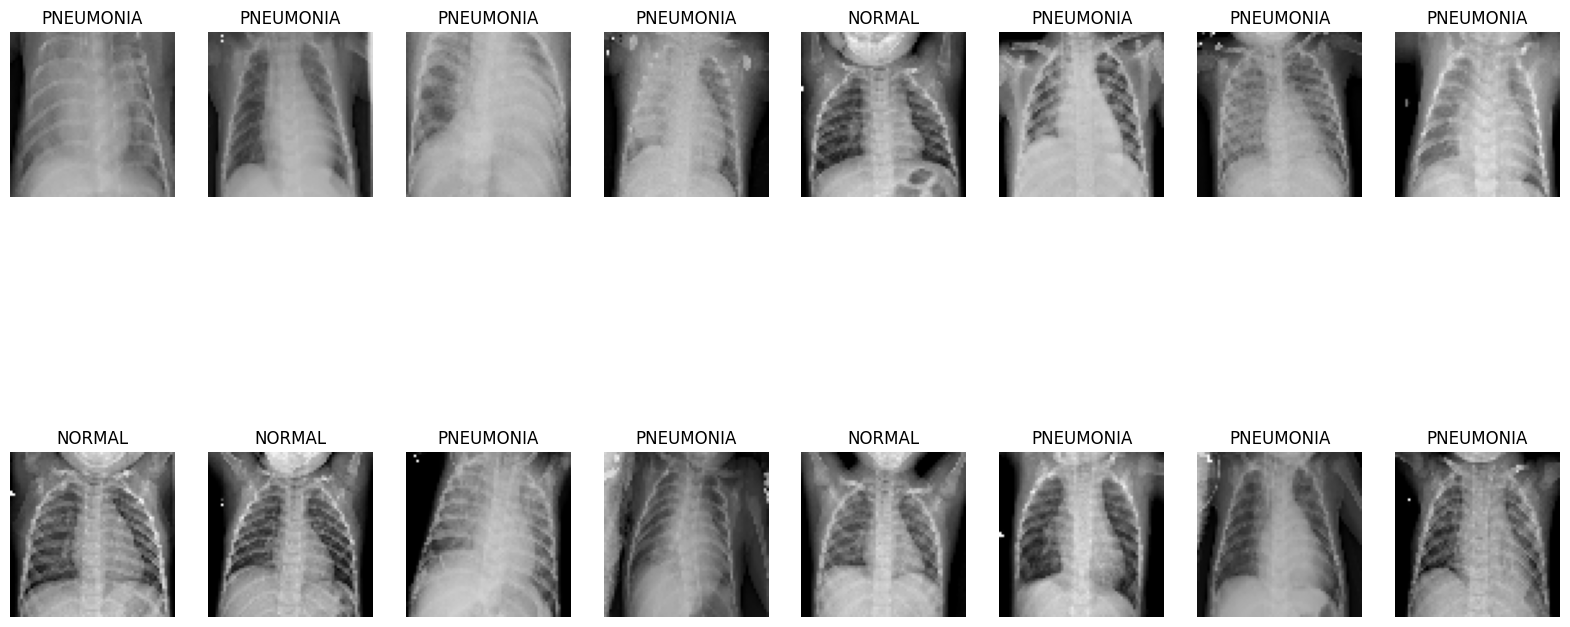

In [ ]:
plt.figure(figsize=(20,10))
for n , i in enumerate(np.random.randint(0,len(loaded_X_train),16)):
    plt.subplot(2,8,n+1)
    plt.imshow(loaded_X_train[i])
    plt.axis('off')
    plt.title(getcode(loaded_y_train[i]))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
print('KNN accuracy score is: ' + str(knn.score(X_test, y_test)))

KNN accuracy score is: 0.7339743589743589


In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn.score(X_test, y_test)))

KNN accuracy score is: 0.7355769230769231


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn.score(X_test, y_test)))

KNN accuracy score is: 0.7275641025641025


In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn.score(X_test, y_test)))

KNN accuracy score is: 0.7115384615384616


# Add PCA to reduce the amount of features, to n number of components that represent 0.95% variance of data

In [ ]:
#Scaling our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#PCA
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca = PCA(.90)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca = PCA(.80)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
knn_PCA = KNeighborsClassifier(n_neighbors=10)
knn_PCA.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn_PCA.score(X_test, y_test)))

KNN accuracy score is: 0.7596153846153846


In [ ]:
knn_PCA = KNeighborsClassifier(n_neighbors=12)
knn_PCA.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn_PCA.score(X_test, y_test)))

KNN accuracy score is: 0.7564102564102564


In [ ]:
knn_PCA = KNeighborsClassifier(n_neighbors=15)
knn_PCA.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn_PCA.score(X_test, y_test)))

KNN accuracy score is: 0.7435897435897436


In [ ]:
knn_PCA = KNeighborsClassifier(n_neighbors=30)
knn_PCA.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn_PCA.score(X_test, y_test)))

KNN accuracy score is: 0.7435897435897436


PCA modified values

In [ ]:
#PCA of .9 percent variability

knn_PCA = KNeighborsClassifier(n_neighbors=10)
knn_PCA.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn_PCA.score(X_test, y_test)))

KNN accuracy score is: 0.8108974358974359


In [ ]:
#PCA of .8 percent variability

knn_PCA = KNeighborsClassifier(n_neighbors=10)
knn_PCA.fit(X_train, y_train)
print('KNN accuracy score is: ' + str(knn_PCA.score(X_test, y_test)))

KNN accuracy score is: 0.7756410256410257
